In [146]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df2016 = pd.read_csv('features_2016.csv')
df2017 = pd.read_csv('features_2017.csv')
dfaircraft = pd.read_csv('aircraftDatabase-2020-11.csv')
dfmodel = pd.read_csv('plane2.csv')

/home/zhanghh/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [147]:
df2017_cargo = df2017[df2017["type"] == 1]
dfaircraft = dfaircraft[["icao24" ,"manufacturername", "model", "typecode", "owner"]]
df2017_cargo_2 = df2017_cargo.merge(dfaircraft, left_on='Icao24', right_on='icao24', how="left")
df2017_cargo_2 = df2017_cargo_2.dropna(subset=['model']).drop_duplicates(subset=['Icao24'])

df2016_cargo = df2016[df2016["type"] == 1]
df2016_cargo_2 = df2016_cargo.merge(dfaircraft, left_on='Icao24', right_on='icao24', how="left")
df2016_cargo_2 = df2016_cargo_2.dropna(subset=['model']).drop_duplicates(subset=['Icao24'])

dfcargo = pd.concat([df2017_cargo_2, df2016_cargo_2])

In [39]:
# !pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

Defaulting to user installation because normal site-packages is not writeable


/home/zhanghh/.local/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [243]:
dfcargo['model_simplified'] = dfcargo['model'].apply(lambda x:process.extractOne(x, dfmodel['model'].to_list(), score_cutoff=70))
model_simplified_list = dfcargo['model_simplified'].to_list()
model_simplified_list = [_[0] if _ != None else None for _ in model_simplified_list]
dfcargo['model_simplified'] = model_simplified_list

dfcargo_2 = dfcargo.merge(dfmodel, left_on = 'model_simplified', right_on = 'model', suffixes=('','_2'), how='left')
dfcargo_2 = dfcargo_2.drop(['type_2','model_simplified'],axis=1)

model_2
737        80.0
747-8F     30.0
757        32.0
767        31.0
777        52.0
A300       22.0
A318        2.0
A319       31.0
A320      106.0
A321       27.0
A330       16.0
A380        8.0
C-5         1.0
Dash 8      2.0
MD-11      26.0
PC          2.0
else       95.0
Name: type, dtype: float64


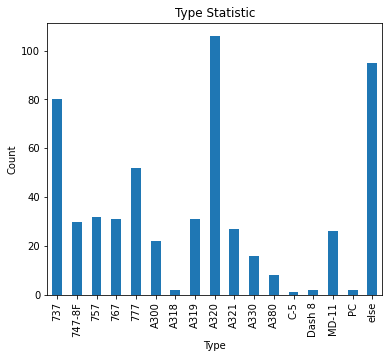

In [246]:
dfcargo_2 = dfcargo_2.replace(np.nan, "else")
dfs = dfcargo_2.groupby(['model_2'])['type'].sum()
print(dfs)
fig = dfs.plot(kind='bar', title='Type Statistic', ylabel='Count', xlabel='Type', figsize=(6,5)).get_figure()
fig.savefig('type_statistic.png')

payload_split
2000        2
4700        2
18200      80
39780      32
48000      22
52700      31
68000       8
70000      16
91670      26
103000    147
122470      1
134200     30
150000      2
177000     31
199000    106
253000     27
Name: Icao24, dtype: int64


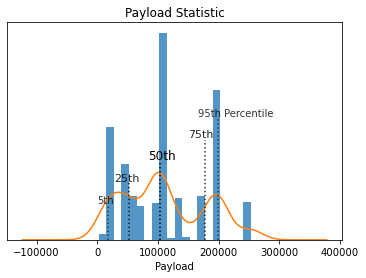

In [335]:
def split_string(floats):
    string = str(floats)
    if string != 'else':
        split = string.split()
        payload = int(split[0].replace(',', ''))
    else:
        payload = 103000
    return payload

dfcargo_2['payload_split'] = dfcargo_2.apply(lambda row: split_string(row['payload']), axis=1)
dfc = dfcargo_2.groupby(['payload_split'])['Icao24'].count()
print(dfc)
dfp = dfcargo_2['payload_split']

fig, ax = plt.subplots(figsize = (6,4))
dfp.plot(kind="hist", density=True, bins=20, alpha = 0.77)
dfp.plot(kind = "kde")

quant_5, quant_25, quant_50, quant_75, quant_95 = dfp.quantile(0.05), dfp.quantile(0.25), dfp.quantile(0.5), dfp.quantile(0.75), dfp.quantile(0.95)
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color="black")

ax.set_xlabel("Payload")
# x_start, x_end = 0, 4
# ax.set_xlim(x_start, x_end)

ax.set_yticklabels([])
ax.set_ylabel("")

# Annotations
# ax.text(0.5, 0.5, 'Some text', transform=ax.transAxes)
ax.text(0.27, 0.17, "5th", size = 10, alpha = 0.8, transform=ax.transAxes)
ax.text(0.32, 0.27, "25th", size = 11, alpha = 0.85, transform=ax.transAxes)
ax.text(0.42, 0.37, "50th", size = 12, alpha = 1, transform=ax.transAxes)
ax.text(0.54, 0.47, "75th", size = 11, alpha = 0.85, transform=ax.transAxes)
ax.text(0.57, 0.57, "95th Percentile", size = 10, alpha =.8, transform=ax.transAxes)

# Overall
ax.grid(False)
ax.set_title("Payload Statistic")

ax.tick_params(left = False, bottom = True)
# for ax, spine in ax.spines.items():
#     spine.set_visible(False)
plt.savefig('payload_statistic.png', bbox_inches='tight')
plt.show()

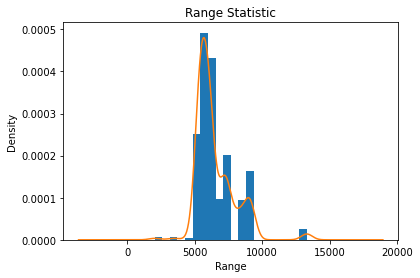

In [332]:
def split_string(floats):
    string = str(floats)
    if string != 'else':
        split = string.split()
        payload = int(split[0].replace(',', ''))
    else:
        payload = 5500
    return payload

dfcargo_2['range_split'] = dfcargo_2.apply(lambda row: split_string(row['range']), axis=1)
dfrc = dfcargo_2.groupby(['range_split'])['Icao24'].count()
dfr = dfcargo_2['range_split']

fig, ax = plt.subplots(figsize = (6,4))

dfr.plot(kind="hist", density=True, bins=20)
dfr.plot(kind = "kde")

# quant_5, quant_25, quant_50, quant_75, quant_95 = dfr.quantile(0.05), dfr.quantile(0.25), dfr.quantile(0.5), dfr.quantile(0.75), dfr.quantile(0.95)
# quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# for i in quants:
#     ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")

ax.set_xlabel("Range")
# x_start, x_end = 0, 4
# ax.set_xlim(x_start, x_end)

# ax.set_yticklabels([])
# ax.set_ylabel("")

# # Annotations
# # ax.text(0.5, 0.5, 'Some text', transform=ax.transAxes)
# ax.text(0.27, 0.17, "5th", size = 10, alpha = 0.8, transform=ax.transAxes)
# ax.text(0.32, 0.27, "25th", size = 11, alpha = 0.85, transform=ax.transAxes)
# ax.text(0.42, 0.37, "50th", size = 12, alpha = 1, transform=ax.transAxes)
# ax.text(0.54, 0.47, "75th", size = 11, alpha = 0.85, transform=ax.transAxes)
# ax.text(0.57, 0.57, "95th Percentile", size = 10, alpha =.8, transform=ax.transAxes)

# Overall
# ax.grid(False)
ax.set_title("Range Statistic")

# ax.tick_params(left = False, bottom = True)
# for ax, spine in ax.spines.items():
#     spine.set_visible(False)
plt.savefig('range_statistic.png', bbox_inches='tight')
plt.show()

In [221]:
dfcargo[['type', 'owner']].groupby(['owner'])['type'].count().nlargest(10)

owner
Federal Express Corp          50
Iberia Express                37
Qatar Airways                 35
United Parcel Service Co      25
Air France                    17
Emirates Airline              16
Sunexpress                    15
Tap Portugal                  14
Thai Airways International    13
Vueling Airlines              12
Name: type, dtype: int64

In [225]:
dfcargo_2[['model_2', 'owner']].groupby(['model_2']).describe()

owner                                                 
        count unique                                  top freq
model_2                                                       
737        80     41                           Sunexpress   15
747-8F     30     16                       Airbridgecargo    7
757        32      9                 Federal Express Corp   13
767        31     11             United Parcel Service Co    9
777        52     16                        Qatar Airways   15
A300       22      5                 Federal Express Corp   12
A318        2      2                       Avianca Brasil    1
A319       31     16                         Tap Portugal    6
A320      106     38                       Iberia Express   35
A321       27     14                           Air France    6
A330       16      4                        Qatar Airways   11
A380        8      2                     Emirates Airline    7
C-5         1      1                   United States Army    1
Dash 8      2      2                              Private    1
MD-11      26      3                 Federal Express Corp   15
PC          2      2                        Pi Sn1576 Llc    1
else       95     57  Cityjet Designated Activity Company   11

In [217]:
df2017_2 = df2017.merge(dfaircraft, left_on='Icao24', right_on='icao24', how="left")
df2016_2 = df2016.merge(dfaircraft, left_on='Icao24', right_on='icao24', how="left")
dfall = pd.concat([df2017_2, df2016_2])
dfall[['type', 'owner']].groupby(['owner'])['type'].count().nlargest(10)

owner
Ryanair Designated Activity Company    1099
Easyjet Airline                        1047
Air France                              672
British Airways                         562
Klm Royal Dutch Airlines                383
Lufthansa                               365
Iberia                                  353
Scandinavian Airlines System            351
United Airlines Inc                     319
Southwest Airlines Co                   265
Name: type, dtype: int64